# <center> Homework 9, Pandas



## Правила

- Не создавайте копию этого ноутбуке, решайте прямо тут.
- Пишите код только там, где это от вас требуется (`# YOUR CODE HERE`)
- Написав, удаляйте `raise NotImplementedError() `
- Не переименовывайте переменные, если они уже созданы. Происходят автопроверки.
- Под заданием для вас приведены проверки с помощью `assert`. Они падают с ошибкой если решено не правильно и молчат если всё правильно.
- Перед отправкой проверьте что ваш ноутбук работает. Нажмите на панели сверху `Kernel` -> `Restart Kernel and Run All Cells...`. Проверьте что нет ошибок.
    

#### Погнали!

---


In [1]:
# импорты
import numpy as np
import pandas as pd

# а сюда можно не смотреть,
# просто пару технических вещей
import hashlib
from IPython.display import display

pd.DataFrame.__hash__ = lambda self: int(
    hashlib.sha256(pd.util.hash_pandas_object(self, index=True).values).hexdigest(),
    base=16,
)
pd.core.indexes.base.Index.__hash__ = lambda self: int(
    hashlib.sha256(pd.util.hash_pandas_object(self, index=True).values).hexdigest(),
    base=16,
)
pd.Series.__hash__ = lambda self: int(
    hashlib.sha256(pd.util.hash_pandas_object(self, index=True).values).hexdigest(),
    base=16,
)

    
## I. Обзор дата-фреймов
    
Здесь будем работать с дата-фреймом `olympics`



<a href='https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results'><img src="https://i.ytimg.com/vi/b4wlPz9p4e8/maxresdefault.jpg" align="center" width="500" ></a>

In [2]:
olympics = pd.read_csv('https://github.com/cleuer/olympics/raw/master/src/main/resources/olympic_history_120_years.csv')

#### **Задание 1**💅

Выведите первые 3 строки дата-фрейма

In [3]:
result = olympics.head(3)
display(result)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
assert len(result) == 3
assert isinstance(result, pd.core.frame.DataFrame)
assert hash(result) == 507558853293347520

#### **Задание 2** 💅

Выведите названия всех колонок в дата-фрейме

In [5]:
result = olympics.columns
display(result)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
assert len(result) == 15
assert isinstance(result, pd.core.indexes.base.Index)
assert hash(result) == 204161812668953242

#### **Задание 3** 💅

Сколько колонок имеют `ei` в имени?

In [7]:
result = sum(['ei' in column for column in olympics.columns])

In [8]:
assert result == 2

#### **Задание 4** 💅

Выведите размерность дата-фрейма

In [9]:
result = olympics.shape

In [10]:
assert result == (271116, 15)

#### **Задание 5** 💅

Выведите количество NA в колонке `Weight`

In [11]:
result = olympics.Weight.isna().sum()

In [12]:
assert result == 62875

#### **Задание 6** 💅
 
Выведите количество уникальных значений в колонке `Weight` (для этого есть отдельный метод)

In [13]:
result = olympics.Weight.nunique()

In [14]:
assert result == 220

#### **Задание 7** 💅

Выведите самое часто-встречаемое значение в колонке `Weight`

In [15]:
result = olympics.Weight.value_counts(ascending=False).index[0]

In [16]:
assert result == 70.0

#### **Задание 8** 💅

Выведите максимальное значение в колонке `Weight`

In [17]:
result = olympics.Weight.max()

In [18]:
assert result == 214.0

#### **Задание 9** 💅

Сколько колонок в дата-фрейме имеют тип данных `float64`?

In [20]:
result = sum(olympics.dtypes == 'float64')

In [21]:
assert result == 3

## II. Отбор данных

#### **Задание 10** 💅

Как зовут атлета в `140228`й по счету строке дата-фрейма?

In [22]:
result = olympics.iloc[140227].Name

In [23]:
assert result == 'Yuliya Vyacheslavovna Lipnitskaya'

#### **Задание 11** 💅

В каком городе проходили игры, запись с которых сделана в строке с индексом 360?

In [25]:
result = olympics.loc[360].City

In [26]:
assert result == 'Seoul'

#### **Задание 12** 💅

Отберите все записи относящиеся к мужчинам

In [27]:
result = olympics.query('Sex == "M"')

In [28]:
assert len(result) == 196594
assert hash(result) == 53408147431013694

#### **Задание 13** 💅

Отберите все записи относящиеся к летним играм в Барселоне

In [29]:
result = olympics.query('Season == "Summer" and City == "Barcelona"')

In [30]:
assert len(result) == 12977
assert hash(result) == 1257297863566133861

#### **Задание 14** 💅

Какую медаль получила Юлия Липницкая в зимних играх 2014 года в индивидуальном зачёте?

In [31]:
result = olympics.query('Games == "2014 Winter" and ' + 
                        'Name == "Yuliya Vyacheslavovna Lipnitskaya" and ' +
                        'Event  == "Figure Skating Women\'s Singles"')
result = result.Medal.values[0]

In [32]:
assert result is np.nan 

## III. Операции над данными

#### **Задание 15** 💅

Замените все NA в колонке `Medal` на `"No medal"` (для этого есть специальный метод)

In [33]:
olympics.Medal = olympics.Medal.fillna("No medal")

In [34]:
assert olympics.Medal.isna().sum() == 0
assert olympics.Medal.value_counts().to_dict()['No medal'] == 231333
assert hash(olympics) == 1196581486896556999

#### **Задание 16** 💅

Создайте в дата-фрейме колонку `BMI` с соотвествующими значениями

In [35]:
olympics['BMI'] = olympics['Weight'] / ( olympics['Height'] / 100 ) ** 2

In [36]:
assert np.isclose(olympics.BMI.mean(), 22.7845, atol=1e-3)
assert np.isclose(olympics.BMI.std(), 2.9120, atol=1e-3)
assert olympics.BMI.isna().sum() == 64263
assert hash(olympics) == 1059869394349329045

#### **Задание 17** 💅

Сколько спортсменов смоги получить одну и ту же медаль в рамках одних и тех же игр несколько раз? 

Отсутсвие медали здесь не учитывается. Вам может помочь метод `duplicated`.

In [37]:
result = olympics[olympics.duplicated(subset=['Name', 'Games', 'Medal'])].query('Medal!="No medal"').Name.nunique()

In [38]:
assert result == 1572

#### **Задание 18** 💅

Какова частота встречаемости серебряной медали среди атлетов из Австрии?

Вам может помочь изучение параметров метода `value_counts`

In [39]:
result = olympics.query('Team=="Austria"')[['Medal']].value_counts(normalize=True)['Silver']

In [40]:
assert np.isclose(result, 0.0345, atol=1e-3)

## IV. Группировка и сводные таблицы

Для выполнения заданий в этом блоке вам понадобятся (19) методы `groupby`, `aggregate` (или сокращенно `agg`) и (20) функция `pd.pivot_table`. Мы их еще обсудим на 11й лекции, а пока вам предлагается самостоятельно познакомиться с базовым использованием

#### **Задание 19** 💅

Для каждых игр `Games` посчитайте максимальный возвраст атлетов `Age`. В результате вы получите `pd.Series`, которую дополнительно отсортируйте *по-убыванию*

In [41]:
result = olympics.groupby('Games').Age.agg('max').sort_values(ascending=False)

In [42]:
assert result.iat[0] == 97
assert result.iat[-1] == 39
assert result['2000 Summer'] == 63
assert hash(result) == 1457356433364700767

#### **Задание 20** 💅

Постройте сводную таблицу где для каждого вида спорта `Sport` (это *index*) и для каждого года `Year` (это *columns*) будет посчитан средний возраст участвующих спортсменов `Age` (это *values*). 

Подсказка: чему равно дефолтное значение параметра `aggfunc`?

In [43]:
result = pd.pivot_table(olympics,
                        index='Sport',
                        columns='Year',
                        values='Age',
                        aggfunc='mean'
                       )

In [44]:
assert set(result.index) == set(olympics.Sport.unique())
assert set(result.columns) == set(olympics.Year.unique())
assert np.isclose(result.min(axis=None), 16.7857, atol=1e-3)
assert np.isclose(result.max(axis=None), 53.3333, atol=1e-3)
assert hash(result) == 2012077184460117741

---

### **Доп. задание**

В чем разница между такими пропущенными значениями, как NA, None, NAN, NULL? Как минимум, нужно расшифровать эти названия. *+ Respect* если оформите это в виде анекдота.

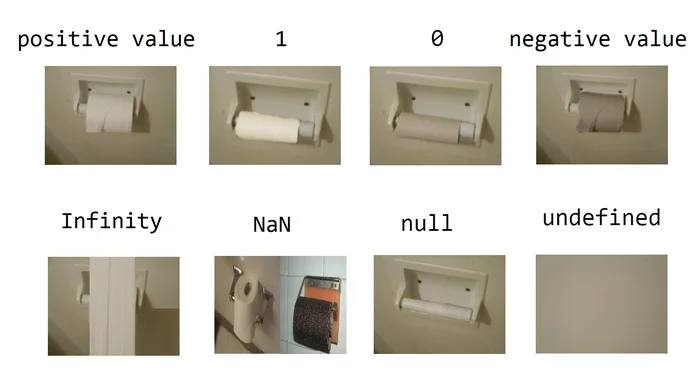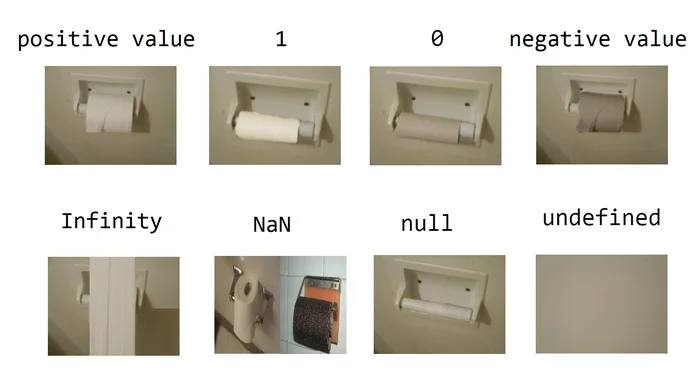

### **Задание XXX**

Нажмите на панели сверху `Kernel` -> `Restart Kernel and Run All Cells...`. Проверьте что нет ошибок.

---

Надеюсь, у тебя всё получилось! Но в любом случае - ты молодец:)🥳

---